In [45]:
#Import packages 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('tested.csv')

In [47]:
# intial steps to understand the data

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [49]:
df.shape # we have 12 columns and 418 rows 

(418, 12)

In [50]:
df.info()
#get some basic information on the dataset...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [51]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [52]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [53]:
df.isna().sum() 
# get a summary of the missing values for each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [54]:
# due to the fact the most of the entries in the Cabin feature are missing we will drop the column all together

In [55]:
df = df.drop('Cabin' , axis = 1)

In [56]:
df.shape # as we can see now we have one less column

(418, 11)

In [57]:
type(df)

pandas.core.frame.DataFrame

In [58]:
df['Age'].isnull().value_counts()

False    332
True      86
Name: Age, dtype: int64

In [59]:
df.dropna(inplace=True) # drop all the missing values from the df

In [60]:
df['Age'].isna().value_counts() 

False    331
Name: Age, dtype: int64

In [61]:
df['Age'] = df['Age'].astype(int) #change into integer

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  331 non-null    int64  
 1   Survived     331 non-null    int64  
 2   Pclass       331 non-null    int64  
 3   Name         331 non-null    object 
 4   Sex          331 non-null    object 
 5   Age          331 non-null    int64  
 6   SibSp        331 non-null    int64  
 7   Parch        331 non-null    int64  
 8   Ticket       331 non-null    object 
 9   Fare         331 non-null    float64
 10  Embarked     331 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 31.0+ KB


In [63]:
#lets create an age category columns

In [64]:
df.loc[(df.Age >= 0) & (df.Age <= 10), 'AgeCategory'] = 1
df.loc[(df.Age >=11) & (df.Age <= 20), 'AgeCategory'] = 2
df.loc[(df.Age >=21) & (df.Age <= 30), 'AgeCategory'] = 3
df.loc[(df.Age >=31) & (df.Age <= 40), 'AgeCategory'] = 4
df.loc[(df.Age >=41) & (df.Age <= 50), 'AgeCategory'] = 5
df.loc[(df.Age >=51) & (df.Age <= 60), 'AgeCategory'] = 6
df.loc[(df.Age >=61) & (df.Age <= 70), 'AgeCategory'] = 7
df.loc[(df.Age >=71) & (df.Age <= 80), 'AgeCategory'] = 8

In [65]:
df['AgeCategory'].max() #check there is not higher age than what we have 

8.0

In [66]:
df['AgeCategory'].value_counts()

3.0    131
4.0     56
2.0     47
5.0     45
1.0     22
6.0     20
7.0      9
8.0      1
Name: AgeCategory, dtype: int64

In [67]:
df['AgeCategory'] = df['AgeCategory'].astype(int)

In [68]:
df['AgeCategory'].value_counts()

3    131
4     56
2     47
5     45
1     22
6     20
7      9
8      1
Name: AgeCategory, dtype: int64

<AxesSubplot:title={'center':'Age categories'}>

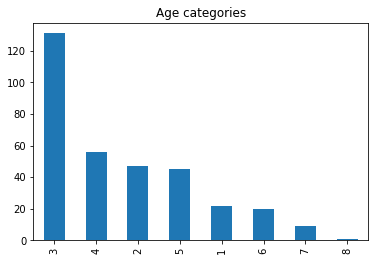

In [69]:
df['AgeCategory'].value_counts().plot.bar(title = "Age categories")
#bar plot to represent the ageCategory column

<AxesSubplot:>

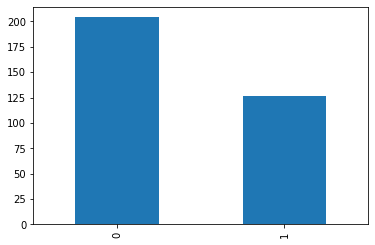

In [70]:
df['Survived'].value_counts().plot.bar()

male      204
female    127
Name: Sex, dtype: int64

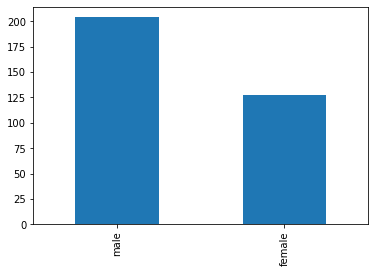

In [71]:
df['Sex'].value_counts().plot.bar()
df['Sex'].unique()
df['Sex'].value_counts()

In [72]:
#change the values of the sex columns from categorical to numerical
df['Sex'].replace(to_replace= 'male', value= 1, inplace= True)
df['Sex'].replace(to_replace = 'female', value = 0, inplace=True)

In [73]:
df['Sex'].value_counts()

1    204
0    127
Name: Sex, dtype: int64

In [74]:
df['Embarked'].value_counts() # C = Cherbourg, S = Southampton, Q = Queenstown

S    227
C     82
Q     22
Name: Embarked, dtype: int64

In [75]:
df['Ticket'].value_counts()

PC 17608              5
113503                4
SOTON/O.Q. 3101315    3
PC 17483              3
C.A. 31029            3
                     ..
113054                1
113801                1
315091                1
250650                1
248738                1
Name: Ticket, Length: 284, dtype: int64

In [76]:
df['Pclass'].value_counts()

3    145
1     98
2     88
Name: Pclass, dtype: int64

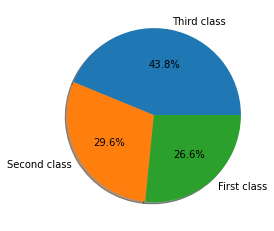

In [77]:
plt.pie(df['Pclass'].value_counts(), labels= ['Third class', 'Second class', 'First class'] , shadow=True, autopct='%1.1f%%');

In [78]:
df.nunique()

PassengerId    331
Survived         2
Pclass           3
Name           331
Sex              2
Age             64
SibSp            7
Parch            7
Ticket         284
Fare           148
Embarked         3
AgeCategory      8
dtype: int64

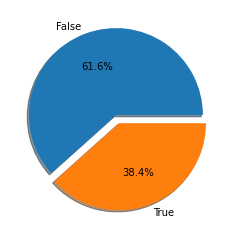

In [79]:
plt.pie(df['Survived'].value_counts(),explode= [0, 0.1],  labels = ['False', 'True'], shadow=True, autopct='%1.1f%%');

In [80]:
# analyse categorical features 

In [81]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex  Survived
0    1           127
1    0           204
Name: Survived, dtype: int64

In [82]:
# where 0 represents females and 1 represents males 

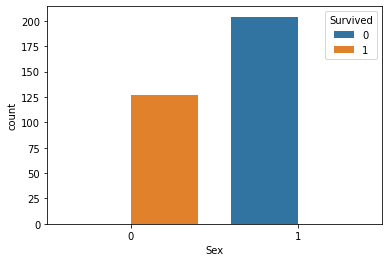

In [83]:
sns.countplot(x = 'Sex', hue = 'Survived', data = df);

In [84]:
pd.crosstab(df.Pclass, df.Survived, margins = True)

Survived,0,1,All
Pclass,,,
1,50,48,98
2,59,29,88
3,95,50,145
All,204,127,331


<AxesSubplot:xlabel='Survived', ylabel='count'>

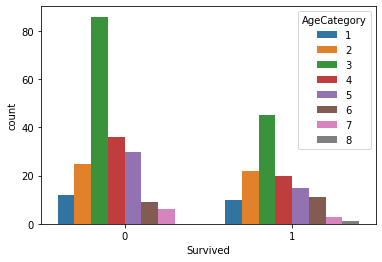

In [85]:
#number of passingers that have survived in relation to their age categpry
sns.countplot(x = 'Survived',hue = 'AgeCategory', data = df)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


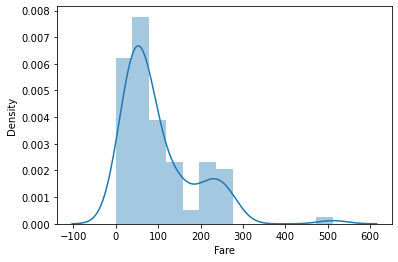

In [86]:
# distribution of fare depending on class of the passenger
sns.distplot(df[df['Pclass'] == 1].Fare);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


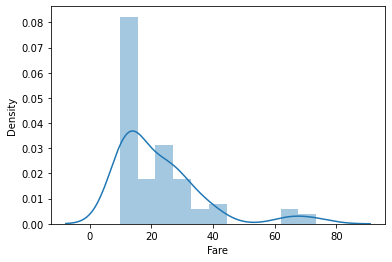

In [87]:
sns.distplot(df[df['Pclass'] == 2].Fare);

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


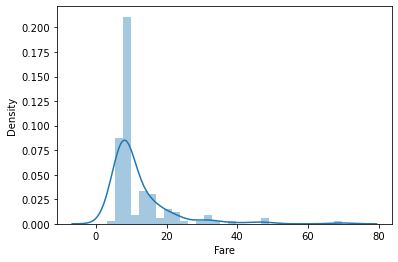

In [88]:
sns.distplot(df[df['Pclass'] == 3].Fare);

In [89]:
#correlation amongs the features 

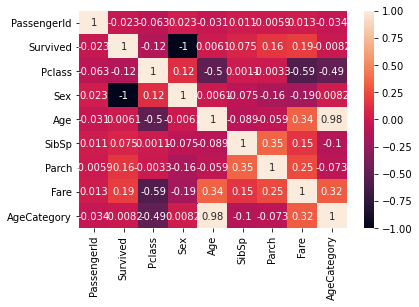

In [90]:
sns.heatmap(df.corr(), annot=True);

In [91]:
 # seperrate numeric variables from categorical 

In [92]:
df_numeric = df[['Age', 'SibSp', 'Parch', 'Fare']]
df_categorical = df[['Survived', 'Pclass', 'Sex', 'Ticket', 'Embarked']]

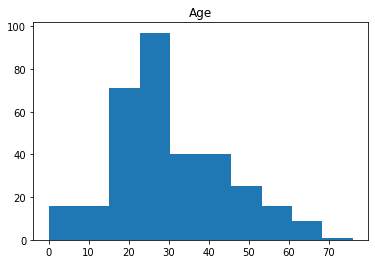

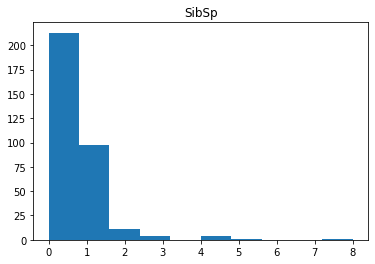

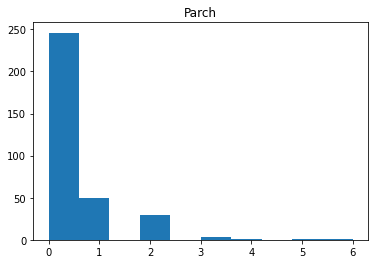

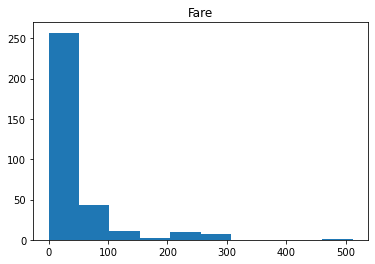

In [93]:
#Histograms for all the numeric
for i in df_numeric:
    plt.hist(df_numeric[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.089015 -0.058914  0.337854
SibSp -0.089015  1.000000  0.350736  0.151836
Parch -0.058914  0.350736  1.000000  0.246088
Fare   0.337854  0.151836  0.246088  1.000000


<AxesSubplot:>

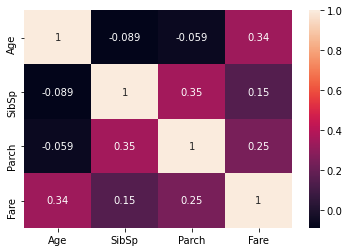

In [94]:
print(df_numeric.corr())
sns.heatmap(df_numeric.corr(), annot=True)

In [95]:
pd.pivot_table(df, index = 'Survived', values = ['Age', 'Fare'])

,Age,Fare
Survived,,
0,30.083333,31.688071
1,30.259843,55.911058


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  331 non-null    int64  
 1   Survived     331 non-null    int64  
 2   Pclass       331 non-null    int64  
 3   Name         331 non-null    object 
 4   Sex          331 non-null    int64  
 5   Age          331 non-null    int64  
 6   SibSp        331 non-null    int64  
 7   Parch        331 non-null    int64  
 8   Ticket       331 non-null    object 
 9   Fare         331 non-null    float64
 10  Embarked     331 non-null    object 
 11  AgeCategory  331 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 41.7+ KB


In [97]:
df['Name'].value_counts()

Dulles, Mr. William Crothers           1
Botsford, Mr. William Hull             1
Fortune, Mrs. Mark (Mary McDougald)    1
Braf, Miss. Elin Ester Maria           1
Lundin, Miss. Olga Elida               1
                                      ..
Reynolds, Mr. Harold J                 1
Ilmakangas, Miss. Ida Livija           1
Cor, Mr. Ivan                          1
Drapkin, Miss. Jennie                  1
Daher, Mr. Shedid                      1
Name: Name, Length: 331, dtype: int64

In [98]:
# Model data pre-processing 

0      4
1      5
2      7
3      3
4      3
      ..
409    1
411    4
412    3
414    4
415    4
Name: AgeCategory, Length: 331, dtype: int64

In [101]:
df.Pclass = df.Pclass.astype('str')

In [107]:
get_dummies = pd.get_dummies(df[['Pclass', 'AgeCategory', 'Sex', 'Parch', 'Embarked', 'Fare', 'Survived']])

In [108]:
get_dummies

,AgeCategory,Sex,Parch,Fare,Survived,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,4,1,0,7.8292,0,0,0,1,0,1,0
1,5,0,0,7.0000,1,0,0,1,0,0,1
2,7,1,0,9.6875,0,0,1,0,0,1,0
3,3,1,0,8.6625,0,0,0,1,0,0,1
4,3,0,1,12.2875,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
409,1,0,1,13.7750,1,0,0,1,0,0,1
411,4,0,0,90.0000,1,1,0,0,0,1,0
412,3,0,0,7.7750,1,0,0,1,0,0,1
414,4,0,0,108.9000,1,1,0,0,1,0,0


In [105]:
#split the data into training and testing

In [109]:
X_train = get_dummies[get_dummies.Survived == 1].drop(['Survived'], axis = 1)
X_test = get_dummies[get_dummies.Survived == 0].drop(['Survived'], axis = 1)

In [110]:
y_train = get_dummies[get_dummies.Survived == 1].Survived